In [130]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

In [131]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
#Mapping from class ID to class name
classes = {0:'plane', 1:'car', 2:'bird', 3:'cat', 4:'deer',
           5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

# Dataset params
num_classes = len(classes)
size = x_train.shape[1]

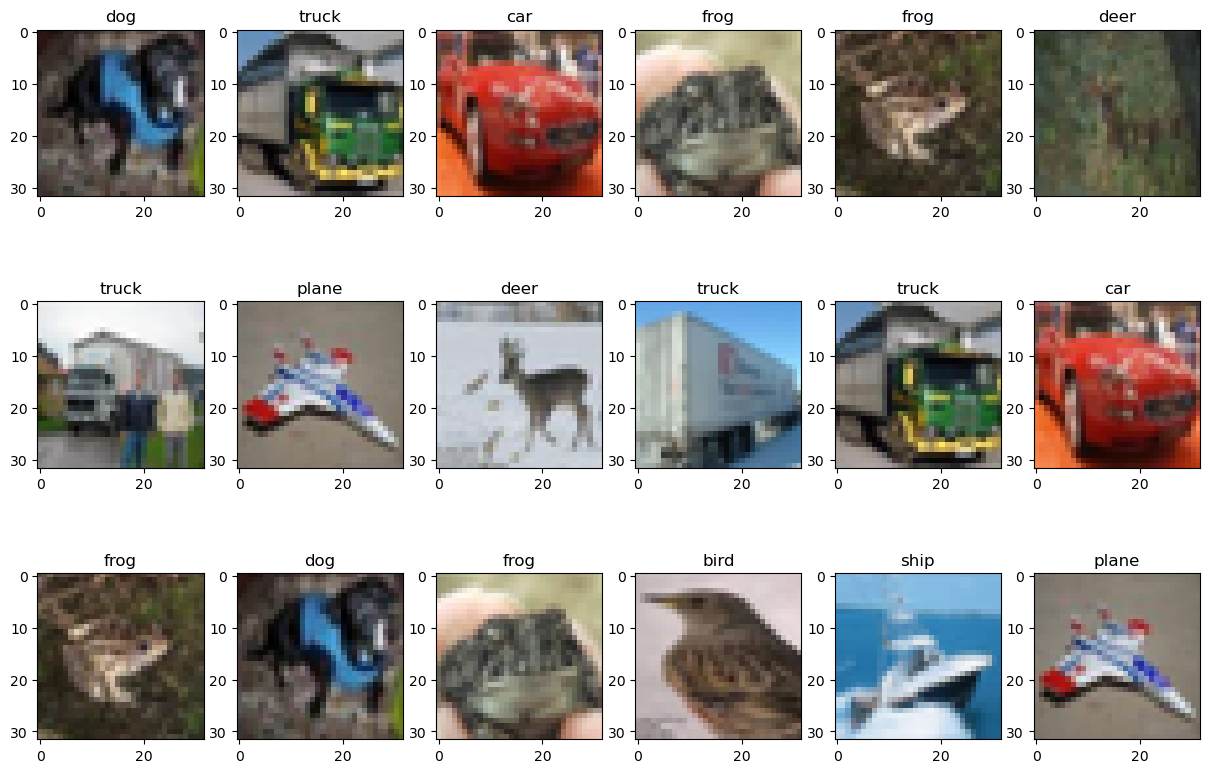

In [132]:
# Visualize random samples (as a plot with 3x6 samples)
for ii in range(18):    
    plt.subplot(3,6,ii+1)
    # Pick a random sample
    idx =  np.random.randint(0, size)
    # Show the image and the label
    plt.imshow(x_train[idx, ...])
    plt.title(classes[int(y_train[idx])])
    #print(x_train[idx, ...])

(Text(0.5, 0, 'Class ID'), Text(0, 0.5, 'counts'))

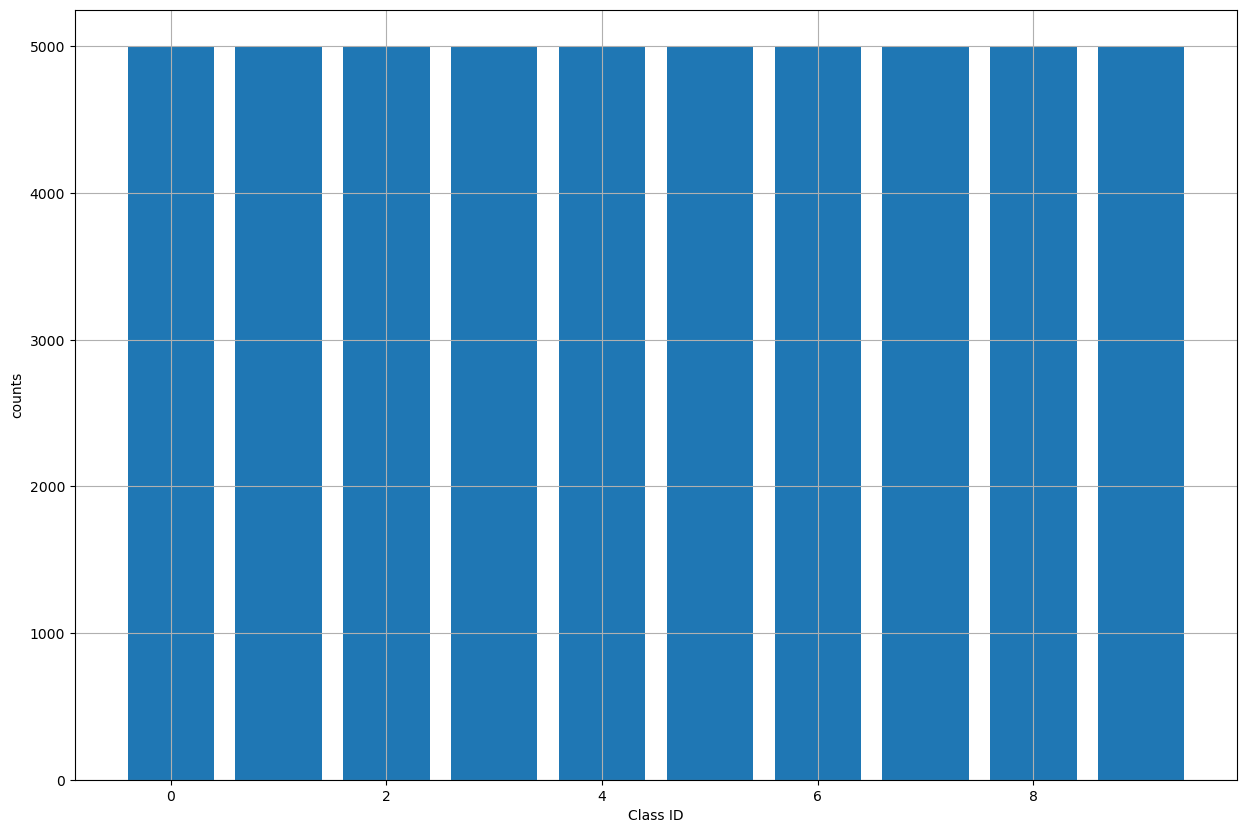

In [133]:
centers = np.arange(0, num_classes + 1)
counts, bounds = np.histogram(y_train, bins=centers-0.5)

plt.bar(centers[:-1], counts), plt.grid(True)
plt.xlabel('Class ID'), plt.ylabel('counts')

In [134]:
# Normalization
x_train = x_train/255
x_test = x_test/255

# One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    50000 samples
Test set:     10000 samples
Sample dims:  (50000, 32, 32, 3)


In [138]:
inputs = Input(shape=(size, size, 3))
print(inputs)

net = Conv2D(32, kernel_size=(3, 3), activation="relu")(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(32, kernel_size=(3, 3), activation="relu")(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Flatten()(net)
outputs = Dense(num_classes, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()
print(net)

<KerasTensor shape=(None, 32, 32, 3), dtype=float32, sparse=None, name=keras_tensor_120>


Model: "functional_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)     │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 13, 13, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │        11,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,674 (84.66 KB)

 Trainable params: 21,674 (84.66 KB)

 Non-trainable params: 0 (0.00 B)

<KerasTensor shape=(None, 1152), dtype=float32, sparse=False, name=keras_tensor_125>


In [139]:
epochs = 25
batch_size = 128

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
#model.compile(loss="SparseCategoricalCrossentropy", optimizer="adam", metrics=["accuracy"])
 
start = time()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
print('Elapsed time', time() - start)

Epoch 1/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.3088 - loss: 1.9265 - val_accuracy: 0.4604 - val_loss: 1.5598
Epoch 2/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.4947 - loss: 1.4357 - val_accuracy: 0.5172 - val_loss: 1.4032
Epoch 3/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.5443 - loss: 1.3038 - val_accuracy: 0.5604 - val_loss: 1.2775
Epoch 4/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.5735 - loss: 1.2254 - val_accuracy: 0.5882 - val_loss: 1.2064
Epoch 5/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.5924 - loss: 1.1698 - val_accuracy: 0.6042 - val_loss: 1.1646
Epoch 6/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.6103 - loss: 1.1251 - val_accuracy: 0.6164 - val_loss: 1.1263
Epoch 7/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.6230 - loss: 1.0879 - val_accuracy: 0.6262 - val_loss: 1.0985
Epoch 8/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.6346 - loss: 1.0562 - val_acc

Train Acc      0.7092888951301575
Validation Acc 0.6815999746322632


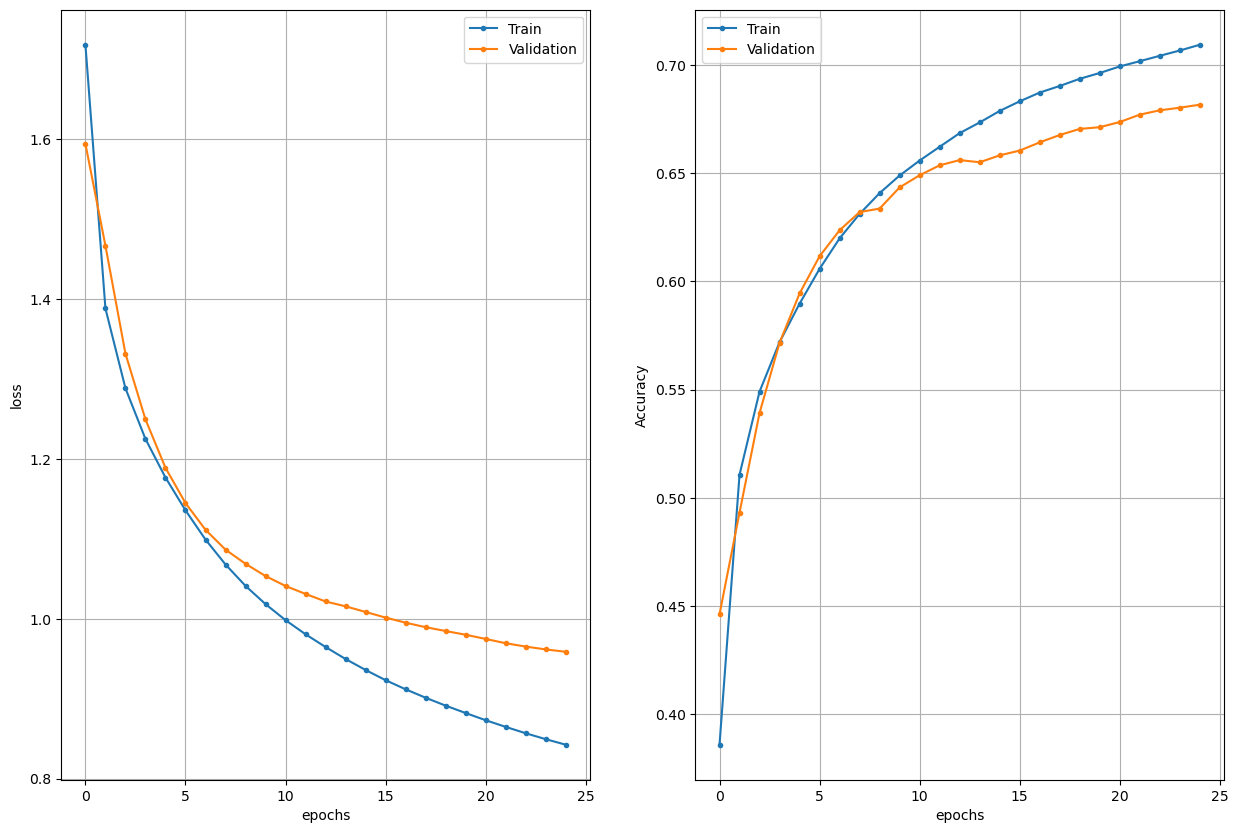

In [137]:
# Show training history (this cell is complete, nothing to implement here :-) )
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1]) 

In [ ]:
Результат явно неудовлетворительный. Дальнейшее усложнение модели: добавление слоев, увеличение количества фильтров,
BatchNormalization, Dropout - не дали приемлимых результатов. Устойчивое впечатление, что я сделал что-то не так в 
самом начале, но не в состоянии увидеть ошибку(